In [10]:
from pathlib import Path
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget


In [11]:
# Navigate to ground motion suite response spectra files
current_dir = os.getcwd()
folder_path = Path(current_dir).resolve().parents[0] / "tests" / "pySLAMMER_suite_resp"
csv_files = list(folder_path.glob("*.csv"))

# Read each CSV file into a DataFrame and store them in a list
freq_index = 0
resp_index = 1
spectra = {}
for csv_file in csv_files:
    data = np.loadtxt(csv_file, delimiter=",", skiprows=2)
    # convert response from cm/s^2 to g's
    data[:, resp_index] = data[:, resp_index] / 981
    spectra[csv_file.name.strip(".csv")] = data




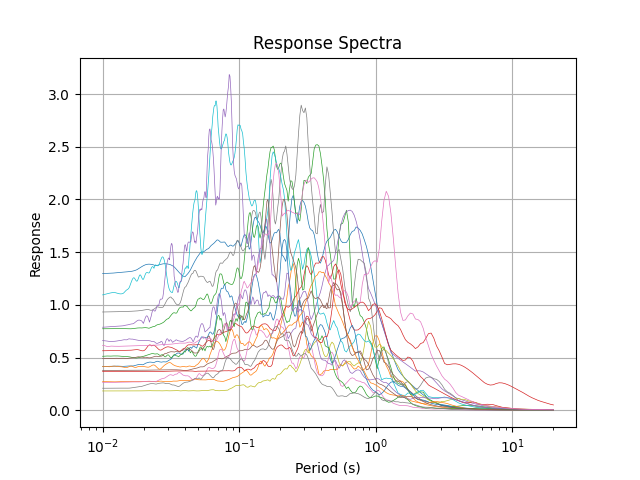

In [ ]:
# Initialize the plot
fig, ax = plt.subplots()

for motion in spectra:
    ax.plot(
        1/spectra[motion][:, freq_index],
        spectra[motion][:, resp_index],
        label=motion,
        linewidth=0.5,
    )


# Add labels, legend, and grid
ax.set_xlabel("Period (s)")
ax.set_ylabel("Response")
ax.set_title("Response Spectra")
ax.set_xscale("log")
# ax.legend(loc="upper right", fontsize="small", title="Filename", title_fontsize="medium")
ax.grid(True)

# Show the plot
plt.show()
